In [17]:
#importing Data Analysis Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

#loading the dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

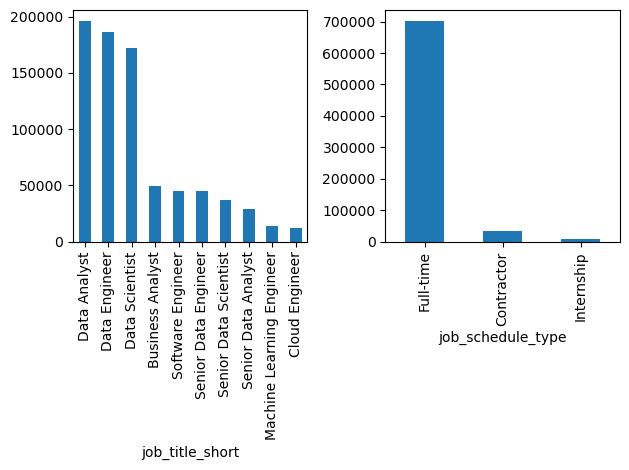

In [18]:
fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])

df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])

fig.tight_layout()

In [19]:
df_skills = df.copy() 
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)

In [20]:
job_titles = ['Data Scientist', 'Data Analyst', 'Data Engineer']

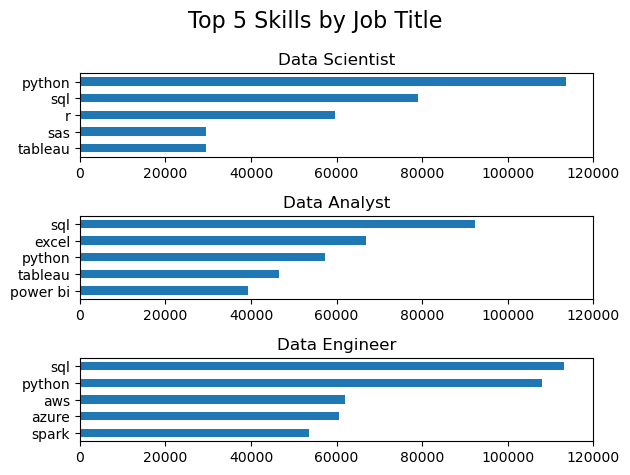

In [34]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    top_skills = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    top_skills.plot(kind='barh',x ='job_skills', y='skill_count', ax=ax[i], title=job_title, legend=False)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,120000)
fig.suptitle('Top 5 Skills by Job Title', fontsize= 16) 
fig.tight_layout()

 